Breast cancer detection

1. Data Collection: 

Load the breast cancer dataset from a CSV file, print the results, and visualize the data using libraries like pandas and matplotlib.

- Load the breast cancer dataset from the specified CSV file.
- Print the first few rows of the dataset to get an overview of the data.
- Print the list of column names to verify all required columns are present.
- Create pairplots for the first few features against the diagnosis to visualize the distribution and relationships between features.
- Generate histograms for each feature to understand the distribution of values.





         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


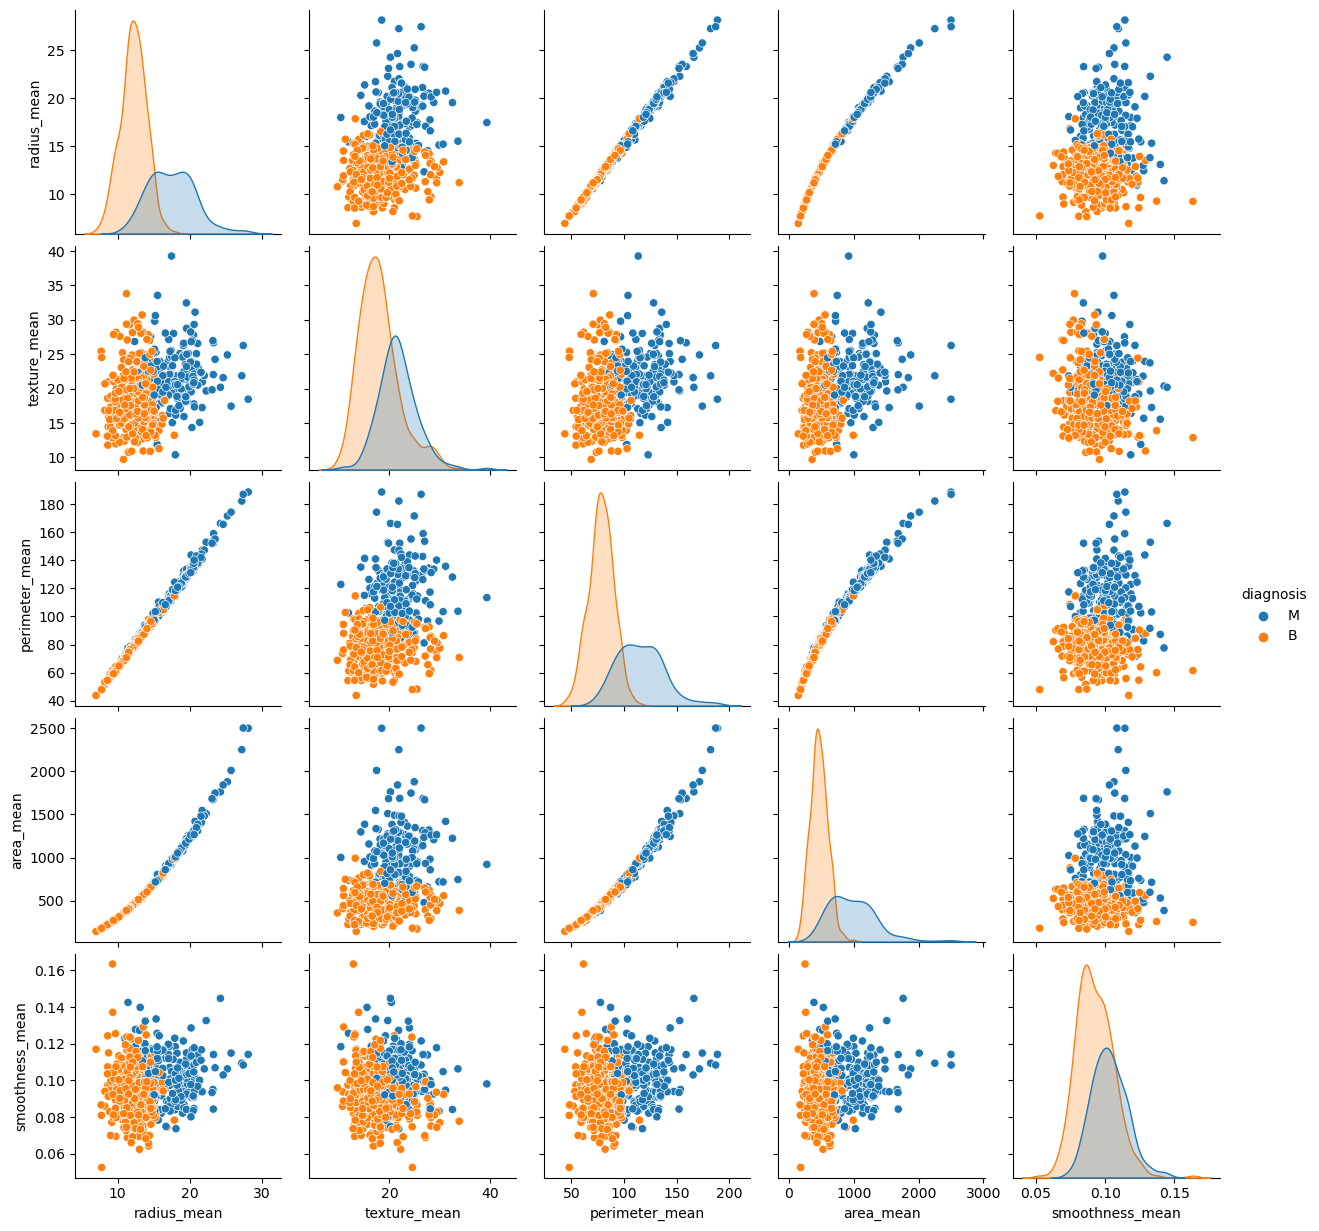

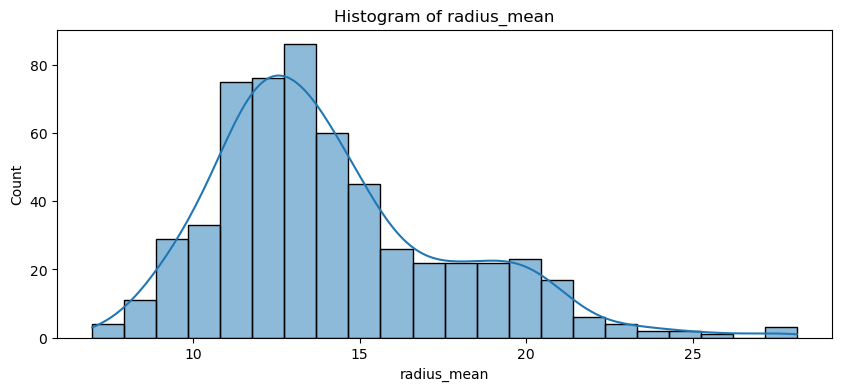

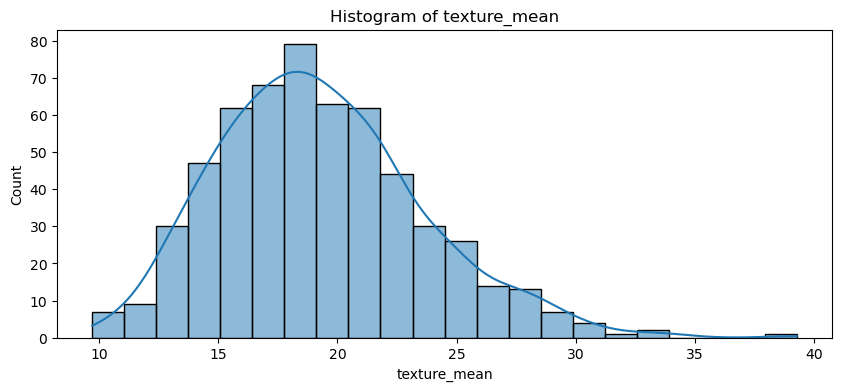

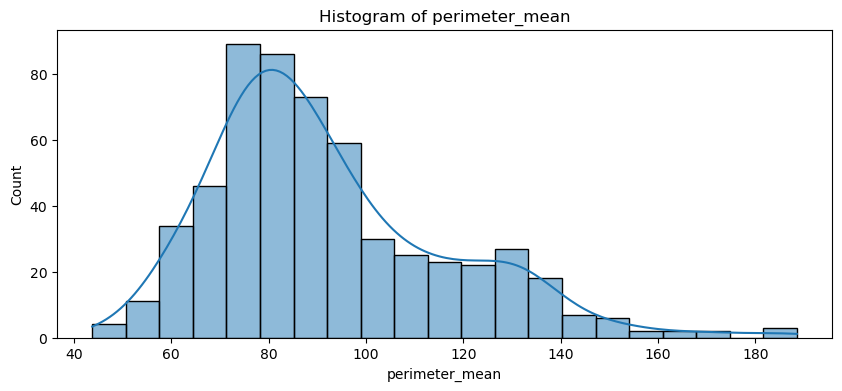

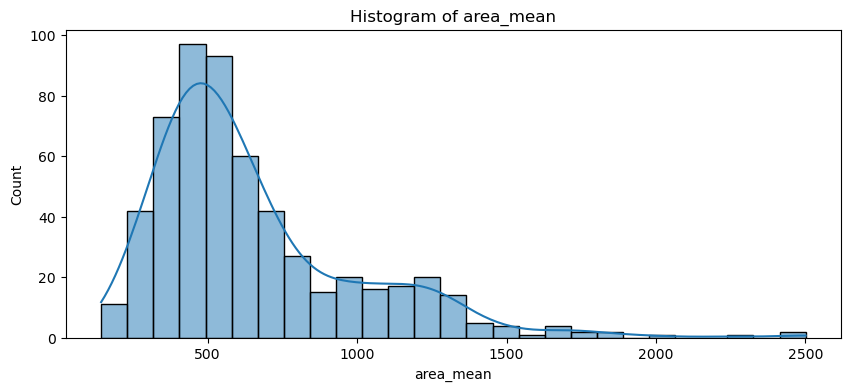

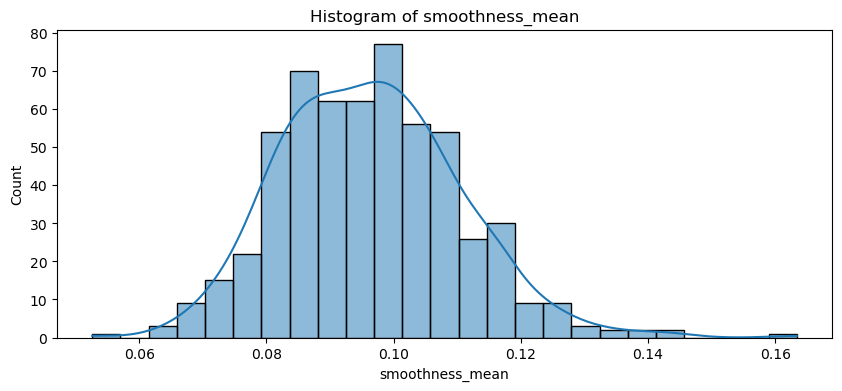

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset_path = 'breastcancer_raw.csv'
data = pd.read_csv(dataset_path)

# Print the first few rows of the dataset
print(data.head())

# Print the column names
print("Columns in the dataset:", data.columns.tolist())

# Visualization: Pairplot for the first few features
# Note: Pairplot can be resource-intensive, so we'll only plot the first few features
sns.pairplot(data, vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'], hue='diagnosis')
plt.show()

# Histogram for each feature
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
for feature in features:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.show()

2. **Preprocessing**: Python code snippet that demonstrates data preprocessing steps for a breast cancer dataset. This includes handling missing values, encoding categorical variables, and normalizing the data. Visualization of the preprocessed data is also included.

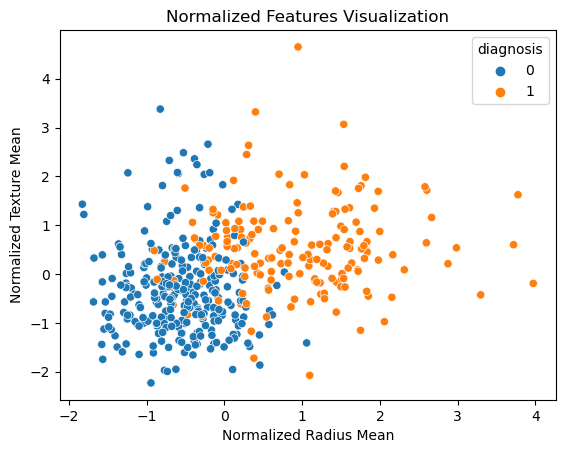

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
dataset_path = 'breastcancer_raw.csv'
data = pd.read_csv(dataset_path)

# Handling missing values
# Assuming 'diagnosis' is the target variable and should not contain missing values
# For simplicity, we'll drop rows with any missing values
data.dropna(inplace=True)

# Encoding categorical variables
# Convert 'diagnosis' from categorical to numerical values
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Feature scaling
# Normalize the features to have a mean of 0 and a standard deviation of 1
# We'll exclude the 'id' and 'diagnosis' columns from scaling
features_to_scale = data.columns.drop(['id', 'diagnosis'])
scaler = StandardScaler()
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

# Split the dataset into features (X) and target (y)
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualization of the scaled features
# We'll visualize the first two features for simplicity
sns.scatterplot(x=X_train['radius_mean'], y=X_train['texture_mean'], hue=y_train)
plt.title('Normalized Features Visualization')
plt.xlabel('Normalized Radius Mean')
plt.ylabel('Normalized Texture Mean')
plt.show()

3. **Feature Selection**: Python code snippet that demonstrates feature selection using a univariate statistical test (ANOVA F-test) and visualization of the selected features. This method selects the features based on the highest scores.

Top 10 features based on ANOVA F-test:
                 Feature       Score
27  concave points_worst  964.385393
22       perimeter_worst  897.944219
7    concave points_mean  861.676020
20          radius_worst  860.781707
2         perimeter_mean  697.235272
23            area_worst  661.600206
0            radius_mean  646.981021
3              area_mean  573.060747
6         concavity_mean  533.793126
26       concavity_worst  436.691939


<Figure size 1000x500 with 0 Axes>

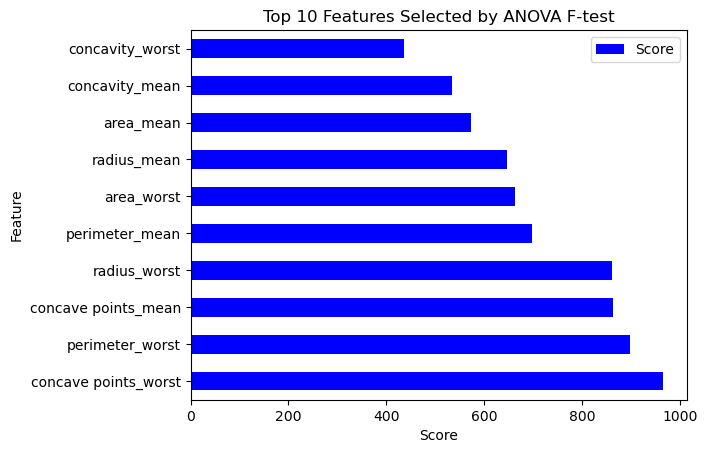

In [3]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

# Load the dataset
dataset_path = 'breastcancer_raw.csv'
data = pd.read_csv(dataset_path)

# Assuming 'diagnosis' is the target variable and it's already encoded to numerical values
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']

# Apply SelectKBest class to extract top 10 features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X, y)

# Get the scores for each feature
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']  # Naming the dataframe columns

# Print the 10 best features
print("Top 10 features based on ANOVA F-test:")
print(featureScores.nlargest(10, 'Score'))

# Plot the scores for better visualization
plt.figure(figsize=(10, 5))
featureScores.nlargest(10, 'Score').plot(kind='barh', x='Feature', y='Score', color='blue')
plt.title('Top 10 Features Selected by ANOVA F-test')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.show()

4. **Model Training**: 

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



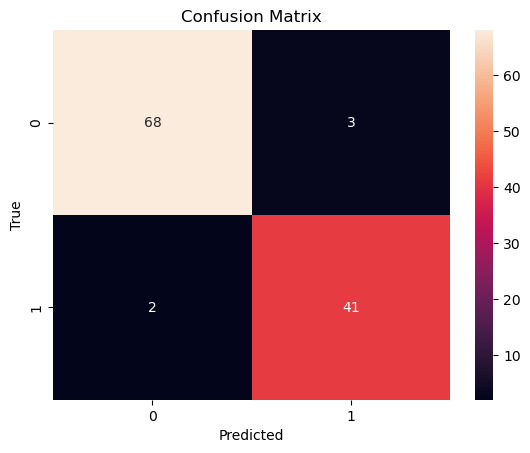

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
dataset_path = 'breastcancer_raw.csv'
data = pd.read_csv(dataset_path)

# Preprocessing steps
# Handling missing values
data.dropna(inplace=True)

# Encoding categorical variables
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Feature scaling
scaler = StandardScaler()
features_to_scale = data.columns.drop(['id', 'diagnosis'])
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

# Split the dataset into features (X) and target (y)
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

5. **Validation**: Python code snippet that demonstrates how to perform k-fold cross-validation on a machine learning model using the KFold class from scikit-learn. This example uses a Support Vector Machine (SVM) for classification.

Accuracy for each fold: [0.95614035 0.95614035 0.9122807  0.96491228 0.96460177]
Mean accuracy: 0.9508150908244062


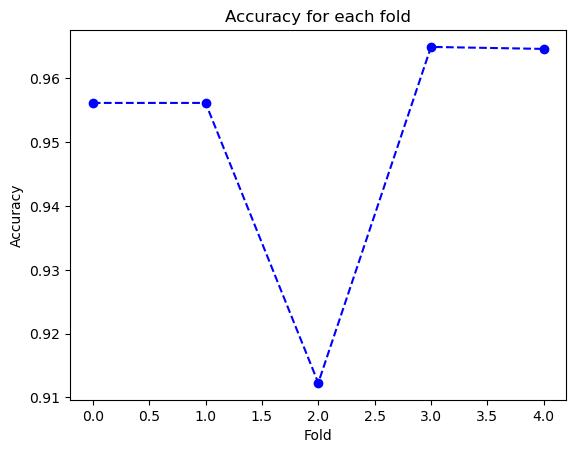

In [6]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Load the dataset
dataset_path = 'breastcancer_raw.csv'
data = pd.read_csv(dataset_path)

# Preprocessing steps (assuming they are already done)
# ...

# Split the dataset into features (X) and target (y)
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']

# Define the model
model = SVC(kernel='linear')

# Define the k-fold cross-validation procedure
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

# Perform the k-fold cross-validation and store the scores
cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

# Print the accuracy for each fold
print(f'Accuracy for each fold: {cv_scores}')

# Print the mean accuracy of all 5 folds
print(f'Mean accuracy: {cv_scores.mean()}')

# Visualization of the scores
plt.plot(cv_scores, marker='o', linestyle='--', color='b')
plt.title('Accuracy for each fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

6. **Evaluation**: To evaluate the performance of a machine learning model for breast cancer detection, you can use the following Python code. This code uses the scikit-learn library to compute the accuracy, precision, recall, and F1-score, and it visualizes the results with a confusion matrix.

Accuracy: 0.96
Precision: 0.93
Recall: 0.95
F1 Score: 0.94


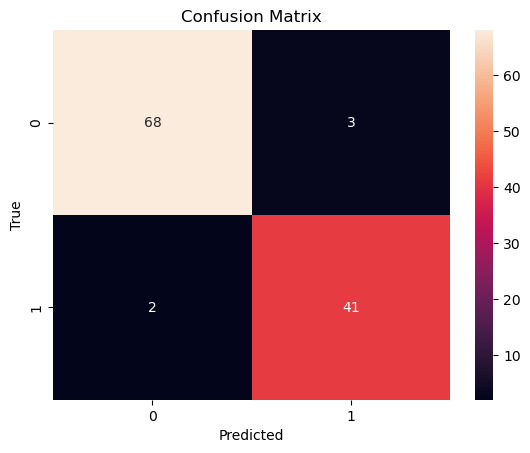

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
dataset_path = 'breastcancer_raw.csv'
data = pd.read_csv(dataset_path)

# Preprocessing steps
# Handling missing values
data.dropna(inplace=True)

# Encoding categorical variables
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Feature scaling
scaler = StandardScaler()
features_to_scale = data.columns.drop(['id', 'diagnosis'])
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

# Split the dataset into features (X) and target (y)
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()